In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv("merged_positive_negative_neutral_final2_0817.csv")

In [6]:
df

,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,...,커뮤니티,언론,페이스북,정부_공공,인스타그램,카카오스토리,기업_단체,지식인,트위터,유투브
0,리그오브레전드,1,0,43.96,93.28,-0.94,1064167,104,613929,7991,...,670,126,5,2,49,0,117,373,612,85
1,피파온라인4,2,1,8.54,94.85,0.94,206673,59,208673,7810,...,15,4,0,0,3,0,0,43,1,42
2,서든어택,3,-1,7.70,36.54,-0.33,186320,73,152465,7487,...,14,9,10,0,0,0,2,15,41,79
3,배틀그라운드,4,0,7.05,33.43,-0.37,170466,95,106982,7256,...,11,83,3,0,7,0,0,60,77,104
4,메이플스토리,6,0,4.50,27.97,0.00,108886,97,66987,7259,...,239,3,1,0,33,0,0,89,75,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49771,믹스마스터,216,-3,0.01,0.02,0.00,94,66,86,38,...,0,0,0,0,0,0,0,0,0,0
49772,야채부락리,221,20,0.01,0.02,0.00,83,42,119,92,...,0,0,0,0,0,0,0,0,1,0
49773,네이비필드,225,6,0.01,0.01,0.00,80,53,90,29,...,0,0,0,0,0,0,0,0,0,0
49774,포키포키,226,3,0.01,0.05,0.00,79,79,60,21,...,0,0,0,0,0,0,0,0,15,0


In [7]:
raw = pd.read_csv("TheLogTextCleaned_0817.csv")

In [8]:
raw

,Unnamed: 0,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,publisher,payType,gameTypeName,date
0,0,리그 오브 레전드,1,0,43.96,93.28,-0.94,1064167,104,613929,7991,라이엇게임즈,P,RTS,2020-12-31
1,1,피파온라인4,2,1,8.54,94.85,0.94,206673,59,208673,7810,넥슨,P,스포츠,2020-12-31
2,2,서든어택,3,-1,7.70,36.54,-0.33,186320,73,152465,7487,넥슨,P,FPS,2020-12-31
3,3,배틀그라운드,4,0,7.05,33.43,-0.37,170466,95,106982,7256,카카오/스팀,P,FPS,2020-12-31
4,4,오버워치,5,0,4.62,21.94,-0.12,111836,88,75568,7230,블리자드,P,FPS,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108914,108914,히어로즈 인 더 스카이,291,2,0.01,0.04,0.00,1,0,0,0,게임어스,F,슈팅,2019-12-28
108915,108915,시아,292,0,0.01,0.01,0.01,1,14,5,0,(주)태울코리아,P,RPG,2019-12-28
108916,108916,Elite Dangerous,293,-5,0.01,0.01,0.00,1,0,0,0,스팀,P,RPG,2019-12-28
108917,108917,로도스도 전기,294,-19,0.01,0.01,0.00,0,0,0,0,(주)엘엔케이로직코리아,P,RPG,2019-12-28


In [9]:
raw = raw.drop("Unnamed: 0", axis = 1)

In [30]:
#게임 이름 excel 파일형식으로
lst = list(raw['gameName'])
for i in range(len(lst)):
    lst[i] = ''.join(char for char in lst[i] if char.isalnum())
raw['gameName'] = lst

In [31]:
subdf = raw[raw['date'] == "2020-12-31"]
lst = list(subdf['gameName'])
lst

['리그오브레전드',
 '피파온라인4',
 '서든어택',
 '배틀그라운드',
 '오버워치',
 '메이플스토리',
 '아이온',
 '스타크래프트리마스터',
 '던전앤파이터',
 '리니지2',
 '로스트아크',
 'EternalReturn',
 '리니지',
 '월드오브워크래프트',
 '엘리온',
 '카트라이더',
 '발로란트',
 '워크래프트3리포지드',
 '사이퍼즈',
 'GTA5',
 '디아블로3',
 '블레이드amp소울',
 '검은사막',
 '스타크래프트2',
 '스페셜포스',
 '크레이지아케이드',
 '한게임로우바둑이',
 '테일즈런너',
 '거상',
 '히어로즈오브더스톰',
 '레인보우식스시즈',
 'APEXLEGENDS',
 '패스오브엑자일',
 '마비노기영웅전',
 'R2',
 'DOTA2',
 'DeadbyDaylight',
 '피망고스톱',
 'CounterStrike',
 '피망포커',
 '엘소드',
 '디아블로2',
 '월드오브탱크',
 '콜오브듀티',
 '뮤온라인',
 '카운터스트라이크온라인',
 '한게임하이로우',
 'Destiny',
 '테라',
 '슬러거',
 '하스스톤',
 '한게임바둑',
 '겟앰프드',
 'MonsterHunter',
 '한게임신맞고',
 '프리스타일2',
 '파이널판타지14',
 'TEKKEN7',
 '엠게임바둑',
 '아바',
 '아키에이지',
 '한게임7포커',
 '소울워커',
 '넷마블바둑',
 '마구마구',
 '넷마블윷놀이',
 'EscapefromTarkov',
 '마비노기',
 '클로저스',
 '넷마블사천성',
 '프리스톤테일',
 '천애명월도',
 '피망베가스',
 '넷마블포커리그',
 '한게임라스베가스포커',
 '라테일',
 'Left4Dead2',
 '러브비트',
 '클럽엠스타',
 '한게임신사천성',
 '버블파이터',
 '프리스타일',
 '피망바둑',
 '오디션',
 '미르의전설2',
 '오로바둑',
 'RF온라인',
 '스페셜포스2',
 'AMONGUS',
 'DK온라인',
 '한게임신윷놀이',

In [45]:
len(lst)

300

In [46]:
raw

,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,publisher,payType,gameTypeName,date
0,리그오브레전드,1,0,43.96,93.28,-0.94,1064167,104,613929,7991,라이엇게임즈,P,RTS,2020-12-31
1,피파온라인4,2,1,8.54,94.85,0.94,206673,59,208673,7810,넥슨,P,스포츠,2020-12-31
2,서든어택,3,-1,7.70,36.54,-0.33,186320,73,152465,7487,넥슨,P,FPS,2020-12-31
3,배틀그라운드,4,0,7.05,33.43,-0.37,170466,95,106982,7256,카카오/스팀,P,FPS,2020-12-31
4,오버워치,5,0,4.62,21.94,-0.12,111836,88,75568,7230,블리자드,P,FPS,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108914,히어로즈인더스카이,291,2,0.01,0.04,0.00,1,0,0,0,게임어스,F,슈팅,2019-12-28
108915,시아,292,0,0.01,0.01,0.01,1,14,5,0,(주)태울코리아,P,RPG,2019-12-28
108916,EliteDangerous,293,-5,0.01,0.01,0.00,1,0,0,0,스팀,P,RPG,2019-12-28
108917,로도스도전기,294,-19,0.01,0.01,0.00,0,0,0,0,(주)엘엔케이로직코리아,P,RPG,2019-12-28


# 신제품 있나 확인

In [ ]:
#160개중에 빠진 얘들 있나?

In [37]:
alst = list(set(af.gameName))

In [38]:
#처음 모은 데이터에 있었는데 지금 없어진 게임들(소셜 데이터 전)
deletelst = []
for x in lst:
    if x not in alst:
        print(x)
        deletelst.append(x)

오버워치
EternalReturn
엘리온
발로란트
블레이드amp소울
APEXLEGENDS
DeadbyDaylight
CounterStrike
콜오브듀티
MonsterHunter
EscapefromTarkov
넷마블포커리그
한게임라스베가스포커
오디션
오로바둑
AMONGUS
Cyberpunk2077
한게임파티훌라
리니지리마스터테스트
콜오브듀티
astelliaroyal
디지몬마스터즈
DJMAXRESPECTV
TomClancysTheDivision2
SidMeiersCivilizationVI
넷마블바둑nTV
로한
프리스타일풋볼Z
워록
DontStarveTogether
한게임고스톱
한게임맞포커
Cities
엠게임맞고
넷마블당구포켓볼
DarkSoulsIII
FootballManager2020
넷마블파워쿵쿵따
TotalWar
엠게임컬투맞고
ConquerorsBlade
크리티카
건즈온라인
SidMeiersCiviliaztionV
섀도우아레나
RedDeadRedemption2
메이플스토리2
SCP
HeartsofIronIV
썬온라인
이터널시티
젬파이터
TotalWarWARHAMMERII
EuroTruckSimulator2
엠게임하이로우
실크로드
골프스타
Warface
FarCry5
청풍명월
FallGuys
스키드러쉬
DyingLight
AssassinsCreedOdyssey
Brawlhalla
Phasmophobia
NightoftheDead
EuropaUniversalisIV
TheWitcher3
WorldofTanksBlitz
Borderlands3
라그나로크Zero
피망틀린그림찾기
드래곤네스트
카발2
TomClancysTheDivision
넷마블베가세
GTFO
Arma3
크로스파이어
CompanyofHeroes2
넷마블어썰트기어
미르의전설2테스트
MountampBlade
넷마블파워알까기
씰온라인
피망상하이플러스
엠게임훌라
크로노스
라그하임
Rimworld
그라나도에스파다
TheSims4
드로이얀온라인
이터널시티3
니다온라인
엠게임사천성
콜오브카오스
DayZ
넷마블캐릭챗


In [39]:
firstone = pd.read_csv("avdf.csv")

In [40]:
aflst = list(firstone['gameName'])#검색조건 바꾸기 전 루시데이터

for x in aflst:
    if x in deletelst:
        print(x)

오버워치
한게임라스베가스포커
한게임파티훌라
리니지리마스터테스트
넷마블바둑nTV
로한
프리스타일풋볼Z
워록
한게임고스톱
Cities
엠게임맞고
넷마블당구포켓볼
넷마블파워쿵쿵따
TotalWar
엠게임컬투맞고
크리티카
건즈온라인
엠게임하이로우
피망틀린그림찾기
넷마블베가세
넷마블파워알까기
피망상하이플러스
엠게임훌라
엠게임사천성
넷마블캐릭챗


In [33]:
오버워치

NameError: name '오버워치' is not defined

In [ ]:
#삭제한 얘들 열거
for x in lst:
    if x not in alst:
        print(x)

In [22]:
df[df.gameName == '메이플스토리']

,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,...,커뮤니티,언론,페이스북,정부_공공,인스타그램,카카오스토리,기업_단체,지식인,트위터,유투브
4,메이플스토리,6,0,4.50,27.97,0.00,108886,97,66987,7259,...,239,3,1,0,33,0,0,89,75,120
140,메이플스토리,6,0,4.50,28.79,0.05,99992,97,61243,7188,...,240,3,0,0,43,0,2,108,70,103
276,메이플스토리,6,-1,4.45,27.73,-0.17,94938,100,56916,7141,...,190,4,0,0,47,0,2,135,61,109
412,메이플스토리,5,0,4.62,28.54,-0.40,100289,100,59993,7134,...,254,3,0,0,55,0,1,125,52,111
548,메이플스토리,5,0,5.02,30.83,0.25,142103,111,76411,7325,...,257,1,1,0,51,0,0,131,53,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49099,메이플스토리,5,0,7.28,47.81,0.61,438940,116,225155,9001,...,41,0,0,0,46,2,1,78,54,281
49235,메이플스토리,5,0,6.67,45.75,0.46,408139,110,220912,9002,...,72,0,1,0,38,0,0,84,68,260
49371,메이플스토리,5,0,6.21,43.94,-0.20,304760,100,182857,8936,...,84,1,0,0,49,1,0,89,51,234
49507,메이플스토리,5,0,6.41,44.73,1.24,297379,102,174399,8910,...,94,1,0,0,39,1,0,58,48,290


중복제거

In [41]:
lst = list(subdf['gameName'])
gamelst = []
for i in range(len(lst)):
    if (df[df['gameName'] == lst[i]].shape[0]) == 366:
        gamelst.append(lst[i])



In [42]:
gamelst

['리그오브레전드',
 '피파온라인4',
 '서든어택',
 '배틀그라운드',
 '메이플스토리',
 '아이온',
 '스타크래프트리마스터',
 '던전앤파이터',
 '리니지2',
 '로스트아크',
 '리니지',
 '월드오브워크래프트',
 '카트라이더',
 '워크래프트3리포지드',
 '사이퍼즈',
 'GTA5',
 '디아블로3',
 '검은사막',
 '스타크래프트2',
 '스페셜포스',
 '크레이지아케이드',
 '한게임로우바둑이',
 '테일즈런너',
 '거상',
 '히어로즈오브더스톰',
 '레인보우식스시즈',
 '패스오브엑자일',
 '마비노기영웅전',
 'R2',
 'DOTA2',
 '피망고스톱',
 '피망포커',
 '엘소드',
 '디아블로2',
 '월드오브탱크',
 '뮤온라인',
 '카운터스트라이크온라인',
 '한게임하이로우',
 'Destiny',
 '테라',
 '슬러거',
 '하스스톤',
 '한게임바둑',
 '겟앰프드',
 '한게임신맞고',
 '프리스타일2',
 '파이널판타지14',
 'TEKKEN7',
 '엠게임바둑',
 '아바',
 '아키에이지',
 '한게임7포커',
 '소울워커',
 '넷마블바둑',
 '마구마구',
 '넷마블윷놀이',
 '마비노기',
 '클로저스',
 '넷마블사천성',
 '프리스톤테일',
 '천애명월도',
 '피망베가스',
 '라테일',
 'Left4Dead2',
 '러브비트',
 '클럽엠스타',
 '한게임신사천성',
 '버블파이터',
 '프리스타일',
 '피망바둑',
 '미르의전설2',
 'RF온라인',
 '스페셜포스2',
 'DK온라인',
 '한게임신윷놀이',
 '바람의나라',
 'Human',
 '뮤블루',
 '이카루스',
 'BlackSquad',
 '한게임맞고',
 'Rust',
 'Warframe',
 'ARK',
 'WarThunder',
 '넷마블모두의마블',
 '테일즈위버',
 '카발온라인',
 '로스트사가',
 '넷마블틀린그림찾기',
 '군주온라인',
 '피망장기',
 '7DaysToDie',
 '넷마블장기',
 'Stard

In [43]:
df['date']

0        20201231
1        20201231
2        20201231
3        20201231
4        20201231
           ...   
49771    20200101
49772    20200101
49773    20200101
49774    20200101
49775    20200101
Name: date, Length: 49776, dtype: int64

In [44]:
len(df)

49776

In [45]:
dflst = list(df[df['date']==20200101]['gameName'])
len(dflst)

136

136개 중에 신제품 있나 확인

In [34]:
dflst = list(df[df['date']==20201231]['gameName'])
dflst

['리그오브레전드',
 '피파온라인4',
 '서든어택',
 '배틀그라운드',
 '오버워치',
 '메이플스토리',
 '아이온',
 '스타크래프트리마스터',
 '던전앤파이터',
 '리니지2',
 '로스트아크',
 'EternalReturn',
 '리니지',
 '월드오브워크래프트',
 '엘리온',
 '카트라이더',
 '발로란트',
 '워크래프트3리포지드',
 '사이퍼즈',
 'GTA5',
 '디아블로3',
 '검은사막',
 '스타크래프트2',
 '스페셜포스',
 '크레이지아케이드',
 '한게임로우바둑이',
 '테일즈런너',
 '거상',
 '히어로즈오브더스톰',
 '레인보우식스시즈',
 '패스오브엑자일',
 '마비노기영웅전',
 'R2',
 'DOTA2',
 '피망고스톱',
 'CounterStrike',
 'CounterStrike',
 'CounterStrike',
 'CounterStrike',
 'CounterStrike',
 'CounterStrike',
 'CounterStrike',
 'CounterStrike',
 '피망포커',
 '엘소드',
 '디아블로2',
 '월드오브탱크',
 '콜오브듀티',
 '콜오브듀티',
 '콜오브듀티',
 '뮤온라인',
 '카운터스트라이크온라인',
 '한게임하이로우',
 'Destiny',
 '테라',
 '슬러거',
 '하스스톤',
 '한게임바둑',
 '겟앰프드',
 'MonsterHunter',
 'MonsterHunter',
 'MonsterHunter',
 'MonsterHunter',
 'MonsterHunter',
 'MonsterHunter',
 'MonsterHunter',
 'MonsterHunter',
 '한게임신맞고',
 '프리스타일2',
 '파이널판타지14',
 'TEKKEN7',
 '엠게임바둑',
 '아바',
 '아키에이지',
 '한게임7포커',
 '소울워커',
 '넷마블바둑',
 '마구마구',
 '넷마블윷놀이',
 '마비노기',
 '클로저스',
 '넷마블사천성',
 '프리스톤테일',
 '천애명월도',


In [31]:
#20201231 에 없는 게임은 없었다

dflst = list(df[df['date']==20201231]['gameName'])

for x in dflst:

    if x not in gamelst:
        print(x)

EternalReturn
엘리온
발로란트
CounterStrike
CounterStrike
CounterStrike
CounterStrike
CounterStrike
CounterStrike
CounterStrike
CounterStrike
콜오브듀티
콜오브듀티
콜오브듀티
MonsterHunter
MonsterHunter
MonsterHunter
MonsterHunter
MonsterHunter
MonsterHunter
MonsterHunter
MonsterHunter
AMONGUS
Cyberpunk2077
astelliaroyal
디지몬마스터즈
DJMAXRESPECTV
DarkSoulsIII
섀도우아레나
메이플스토리2
SCP
썬온라인
이터널시티
젬파이터
실크로드
골프스타
Warface
FarCry5
청풍명월
FallGuys
스키드러쉬
DyingLight
Brawlhalla
Phasmophobia
TheWitcher3
Borderlands3
라그나로크Zero
드래곤네스트
카발2
GTFO
Arma3
크로스파이어
넷마블어썰트기어
미르의전설2테스트
씰온라인
크로노스
라그하임
Rimworld
그라나도에스파다
TheSims4
드로이얀온라인
이터널시티3
니다온라인
콜오브카오스
DayZ
능력자X
Divinity
시티레이서
에이카
PAYDAY2
Wolcen
넷마블상하이
Stellaris
GarrysMod
레전드오브룬테라
ForHonor
타이젬바둑
EVEOnline
Insurgency
피망치코치코더큐브
뮤이그니션파이어폭스
아레스온라인
다크에덴
월드오브워쉽
위드
일랜시아
풍림화산
NBA2K20
엠게임오목
ProjectZomboid
Borderlands2
넷마블리치마블
배틀라이트
피망오목
RealmRoyale
RocketLeague
로도스도전기
Fallout4
NoMansSky
신선도
프리프
디오
ANTHEM
엠게임당구
DotaUnderlords
십이지천
큐온라인
엠게임마작
엠게임테마맞고
XCOM2
Kenshi
라피스
Terraria
Magic
Trine4
HITMAN2
DRAG

In [49]:
deletef = pd.DataFrame()

In [50]:
for i in range(len(gamelst)):
    deletef = deletef.append(df[df.gameName == gamelst[i]])
deletef

,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,...,커뮤니티,언론,페이스북,정부_공공,인스타그램,카카오스토리,기업_단체,지식인,트위터,유투브
0,리그오브레전드,1,0,43.96,93.28,-0.94,1064167,104,613929,7991,...,670,126,5,2,49,0,117,373,612,85
136,리그오브레전드,1,0,44.90,93.55,0.53,998016,106,561626,7964,...,762,93,1,0,62,0,116,380,536,85
272,리그오브레전드,1,0,44.37,93.55,0.33,947251,108,525700,7962,...,722,160,0,0,49,0,114,374,481,105
408,리그오브레전드,1,0,44.04,93.63,1.27,956578,107,535318,7935,...,901,154,0,1,67,0,101,360,543,91
544,리그오브레전드,1,0,42.77,93.34,-0.50,1212024,114,635829,7960,...,699,29,2,0,37,0,105,416,507,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49191,포트리스2RED,118,-1,0.02,15.21,0.00,662,29,1331,285,...,0,0,0,0,0,0,0,0,0,0
49325,포트리스2RED,117,0,0.02,16.38,0.00,693,25,1608,342,...,0,0,0,0,0,0,0,0,0,0
49463,포트리스2RED,117,6,0.02,15.47,0.00,517,32,952,254,...,0,0,0,0,0,0,0,0,0,0
49603,포트리스2RED,123,1,0.02,16.97,0.01,478,24,1160,232,...,0,0,0,0,0,0,0,0,0,0


In [62]:
avdf = pd.read_csv("avdf.csv")
avdf

,Unnamed: 0,gameName,gameshare,gameTypeshare,gameType,Positive,Negative,Neutral,Total,P/Total,P/N,N/P,N/Total
0,0,리그오브레전드,48.64,93.58,RTS,3392827,1370618,8297435,13060880,0.259770,2.475399,0.403975,0.104941
1,1,피파온라인4,6.77,91.57,스포츠,42237068,22345398,90010163,154592629,0.273215,1.890191,0.529047,0.144544
2,2,서든어택,5.57,26.34,FPS,788327,223825,809784,1821936,0.432686,3.522069,0.283924,0.122850
3,3,배틀그라운드,7.42,35.12,FPS,6458332,1596519,8098386,16153237,0.399817,4.045258,0.247203,0.098836
4,4,오버워치,6.03,28.53,FPS,1291454,528253,2435204,4254911,0.303521,2.444764,0.409037,0.124151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,156,넷마블캐릭챗,0.01,0.12,보드,3033118,1687043,6728592,11448753,0.264930,1.797890,0.556208,0.147356
157,157,트리오브세이비어,0.03,0.22,RPG,9002983,3283373,14745477,27031833,0.333051,2.741992,0.364698,0.121463
158,158,포키포키,0.01,0.07,액션,70533,24535,149232,244300,0.288715,2.874791,0.347851,0.100430
159,159,Factorio,0.01,0.01,RTS,67,481,236,784,0.085459,0.139293,7.179104,0.613520


In [63]:
avdf = avdf.rename({'gameTypeName': 'gameType'}, axis='columns')

In [64]:
whatType = set(list(avdf['gameType']))
lst = list(avdf['gameType'])
num = []
for x in whatType:
    num.append(lst.count(x))

In [65]:
whatType = list(whatType)

In [84]:
whatType

['FPS', '액션', '보드', 'RPG', '아케이드', '캐주얼', '스포츠', '슈팅', 'RTS', '레이싱', '대전격투']

In [72]:
TypeShare = []
for i in range(len(whatType)):
    TypeShare.append(round(avdf[avdf['gameType'] == whatType[i]].gameshare.sum(),2))

In [81]:
engName = ['board', 'competition', 'RPG', 'RTS', 'Action', "Arcade", 'Racing', 'Casual', 'Sports', 'Shooting', 'FPS']

In [85]:
b = pd.DataFrame({'GameGenre': whatType , 'GameNumber': num, 'GenreShare': TypeShare })

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52992 missing from c

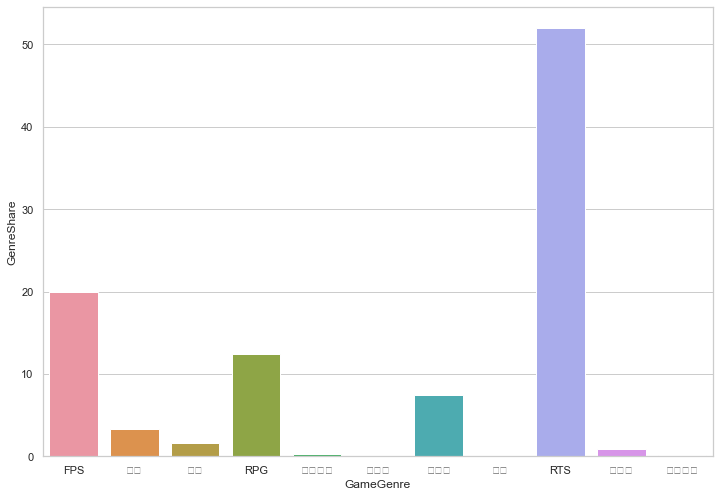

In [86]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(x='GameGenre', y='GenreShare', data=b)
ax = sns.set(rc={'figure.figsize':(12,8.27)})

In [88]:
b

,GameGenre,GameNumber,GenreShare
0,FPS,18,20.00
1,액션,12,3.36
2,보드,45,1.61
3,RPG,58,12.44
4,아케이드,2,0.26
5,캐주얼,3,0.06
6,스포츠,10,7.39
7,슈팅,2,0.06
8,RTS,8,51.96
9,레이싱,1,0.92


In [181]:
df[df.gameName == gamelst[1]].sum()[14:26]

블로그_x       18929612
카페_x         6264728
커뮤니티_x       1796034
언론_x         9600221
페이스북_x         97808
정부_공공_x       232627
인스타그램_x      2905796
카카오스토리_x       75523
기업_단체_x       128914
지식인_x         122011
트위터_x        2046527
유투브_x          37267
dtype: object

In [182]:
df[df.gameName == gamelst[1]].sum()[26:38]

블로그_y       3282166
카페_y        3749627
커뮤니티_y      3204072
언론_y        3785850
페이스북_y       110718
정부_공공_y      139995
인스타그램_y      509545
카카오스토리_y      13865
기업_단체_y      144398
지식인_y        502630
트위터_y       6827376
유투브_y         75156
dtype: object

In [183]:
df[df.gameName == gamelst[1]].sum()[38:50]

블로그        9156359
카페         8281773
커뮤니티       7630492
언론        15836808
페이스북        304015
정부_공공       249825
인스타그램      7668944
카카오스토리      105438
기업_단체       347352
지식인        1506778
트위터       38164767
유투브         757612
dtype: object

In [178]:
df[df.gameName == gamelst[1]].sum()[25]

37267

In [165]:
avdf = pd.DataFrame({'gameName': gamelst, 
                    'gameshare': average_gameshare})
avdf

,gameName,gameshare
0,리그오브레전드,48.64
1,피파온라인4,6.77
2,서든어택,5.57
3,배틀그라운드,7.42
4,오버워치,6.03
...,...,...
156,넷마블캐릭챗,0.01
157,트리오브세이비어,0.03
158,포키포키,0.01
159,Factorio,0.01


In [162]:
round(df[df.gameName == '리그오브레전드'].gameShares.sum()/366,2)

48.64

In [ ]:
#negative/전체 positive/전체 -- 평균 (나중에)



In [ ]:
#장르별 종속변수의 평균 (점유율)



In [338]:
df

,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,...,커뮤니티,언론,페이스북,정부_공공,인스타그램,카카오스토리,기업_단체,지식인,트위터,유투브
0,리그오브레전드,1,0,43.96,93.28,-0.94,1064167,104,613929,7991,...,4468,6855,70,3,5591,13,168,177,4249,387
1,피파온라인4,2,1,8.54,94.85,0.94,206673,59,208673,7810,...,23187,50804,638,1045,14497,290,1300,4730,117692,2467
2,서든어택,3,-1,7.70,36.54,-0.33,186320,73,152465,7487,...,277,381,16,0,56,1,18,59,753,141
3,배틀그라운드,4,0,7.05,33.43,-0.37,170466,95,106982,7256,...,2354,5128,37,8,2243,121,51,392,4644,550
4,오버워치,5,0,4.62,21.94,-0.12,111836,88,75568,7230,...,1228,620,11,0,556,16,35,252,2190,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100774,야채부락리테스트,292,-11,0.01,0.01,0.00,1,79,1,1,...,5469,2879,217,4,7815,125,171,580,16417,2071
100775,로도스도전기,293,-16,0.01,0.01,0.00,1,62,1,1,...,2419,1663,55,12,1514,23,215,469,10707,184
100776,GODEATER3,294,0,0.01,0.01,0.01,0,0,0,0,...,16752,8288,1212,191,8659,234,840,3343,94980,1839
100777,아스가르드,295,0,0.01,0.01,0.01,0,7,1,1,...,2272,3211,48,4,2844,23,66,419,7161,139


# 채널별 비중 (어디서 제일 많이 언급을 하는지)

In [340]:
int(pf.sum(axis=0)['블로그_x'])+ int(pf.sum(axis=0)['블로그_y'])

1207070946

In [341]:
pf.sum(axis=0)

gameName          리그오브레전드리그오브레전드리그오브레전드리그오브레전드리그오브레전드리그오브레전드리그오브...
gameRank                                                    5805627
gameRankUpDown                                                 -823
gameShares                                                  35951.7
gameTypeShares                                               369674
sharesUpDown                                                  -2.35
timeCountTotal                                           1186872850
avgUsedTime                                                 5703855
userCountTotal                                            801741176
useStoreCount                                              60874634
publisher         라이엇게임즈라이엇게임즈라이엇게임즈라이엇게임즈라이엇게임즈라이엇게임즈라이엇게임즈라이엇게...
gameTypeName      RTSRTSRTSRTSRTSRTSRTSRTSRTSRTSRTSRTSRTSRTSRTSR...
date                                                  1190344510887
블로그_x                                                    1040305305
카페_x                                            

In [342]:
a = list(pf.sum(axis=0))

In [343]:
x = 13
sns = []
for i in range(12):
    sns.append(a[x] + a[x+12] + a[x +24])
    x += 1
sns


[1678954179,
 840227245,
 697121333,
 1184267388,
 20615549,
 19883183,
 593617575,
 14112586,
 28786053,
 112055969,
 1918354371,
 49589852]

In [344]:
pf.columns

Index(['gameName', 'gameRank', 'gameRankUpDown', 'gameShares',
       'gameTypeShares', 'sharesUpDown', 'timeCountTotal', 'avgUsedTime',
       'userCountTotal', 'useStoreCount', 'publisher', 'payType',
       'gameTypeName', 'date', '블로그_x', '카페_x', '커뮤니티_x', '언론_x', '페이스북_x',
       '정부_공공_x', '인스타그램_x', '카카오스토리_x', '기업_단체_x', '지식인_x', '트위터_x', '유투브_x',
       '블로그_y', '카페_y', '커뮤니티_y', '언론_y', '페이스북_y', '정부_공공_y', '인스타그램_y',
       '카카오스토리_y', '기업_단체_y', '지식인_y', '트위터_y', '유투브_y', '블로그', '카페', '커뮤니티',
       '언론', '페이스북', '정부_공공', '인스타그램', '카카오스토리', '기업_단체', '지식인', '트위터', '유투브'],
      dtype='object')

In [345]:
d = pd.DataFrame()
d= d.append(sns)


In [346]:
namelst = ['블로그', '카페', '커뮤니티',
       '언론', '페이스북', '정부_공공', '인스타그램', '카카오스토리', '기업_단체', '지식인', '트위터', '유투브']
namelst = ['blog', 'cafe', 'community', 'news', 'facebook', 'government','insta', 'kakao', 'gov', 'naver', 'twitter', 'youtube' ]
d['name'] = namelst

In [347]:
d.columns

Index([0, 'name'], dtype='object')

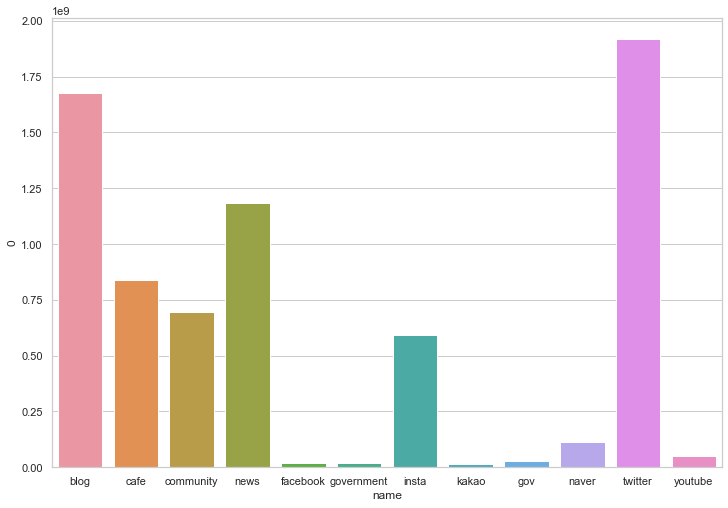

In [349]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="name", y=0, data=d)
ax = sns.set(rc={'figure.figsize':(15,8.27)})


In [1]:
import pandas as pd